# The Correlation Coefficient

The correlation coefficient measures the extent to which the relationship between two variables is linear. Its value is always between -1 and 1. A positive coefficient indicates that the variables are directly related, i.e. when one increases the other one also increases. A negative coefficient indicates that the variables are inversely related, so that when one increases the other decreases. The closer to 0 the correlation coefficient is, the weaker the relationship between the variables.

The correlation coefficient of two series $X$ and $Y$ is defined as
$$r = \frac{Cov(X,Y)}{std(X)std(Y)}$$
where $Cov$ is the covariance and $std$ is the standard deviation.

Two random sets of data will have a correlation coefficient close to 0:

-0.0725671420978


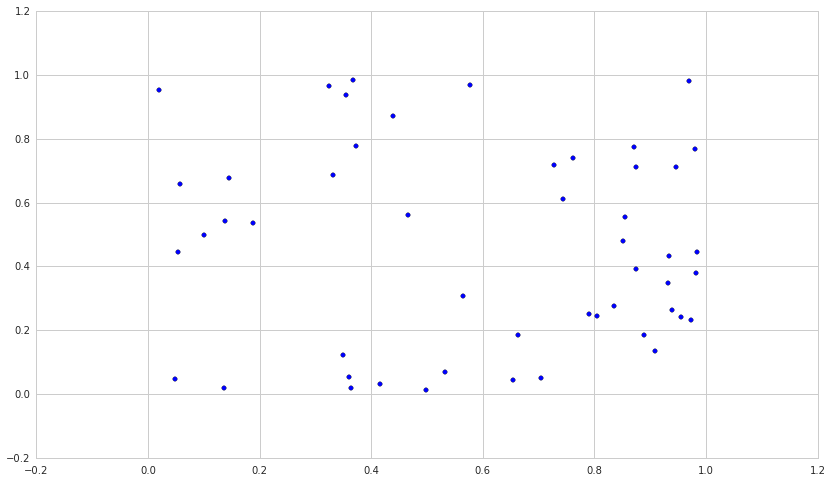

In [32]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
print np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y)) # taking the relevant value from the matrix returned by np.cov

On the other hand, stock prices are often correlated. Below we compare Apple's stock with that of a semiconductor equipment manufacturer, Lam Research Coropration.

Correlation coefficients
LRCX and AAPL:  0.956582655988
LRCX and SPY:  0.937050399317
AAPL and SPY:  0.893919336547


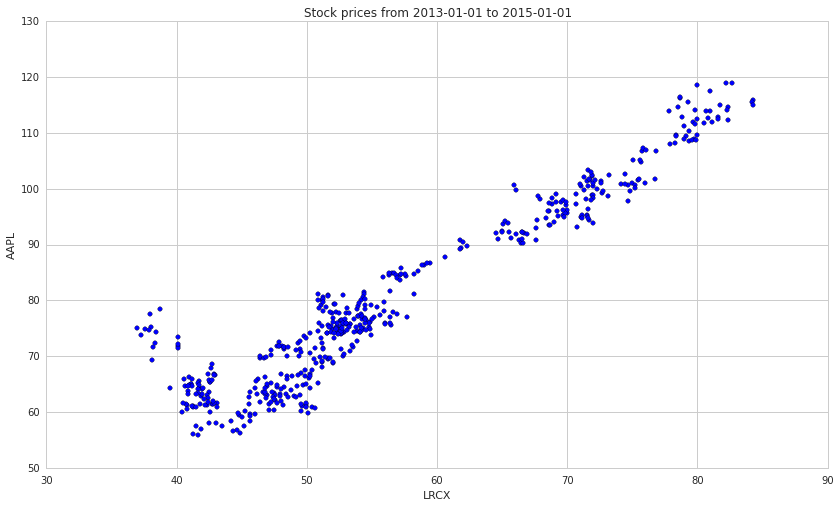

In [56]:
# Pull the pricing data for our two stocks and S&P 500
start = '2013-01-01'
end = '2015-01-01'
bench = get_pricing('SPY', fields='price', start_date=start, end_date=end)
a1 = get_pricing('LRCX', fields='price', start_date=start, end_date=end)
a2 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)

plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to ' + end)
print "Correlation coefficients"
print "LRCX and AAPL: ", np.cov(a1,a2)[0,1]/(np.std(a1)*np.std(a2))
print "LRCX and SPY: ", np.cov(a1,bench)[0,1]/(np.std(a1)*np.std(bench))
print "AAPL and SPY: ", np.cov(bench,a2)[0,1]/(np.std(bench)*np.std(a2))

It's hard to rigorously determine whether or not a correlation is significant, especially when, as here, the variables are not normally distributed. Their correlation coefficient is close to 1, so it's pretty safe to say that the two stock prices are correlated. If we examine the correlation of each of them with the S&P 500, we see that it is also quite high. So, AAPL and LRCX are slightly more correlated with each other than with the average stock.

# Limitations of linear correlation analysis
The correlation coefficient can be useful for examining the strength of the relationship between two variables. However, it's important to remember that two variables may be associated in different, predictable ways which this analysis would not pick up on. For instance, one variable might precisely follow the behavior of a second, but with a delay. Alternatively, a variable may be related to the rate of change of another. Neither of these relationships is linear, but can be very useful if detected.

Additionally, the correlation coefficient can be very sensitive to outliers. This means that including or excluding even a couple of data points can alter your result, and it is not always clear whether these points contain information or are simply noise.